## **Week 2. G2M Insight for Cab Investment Firm**

# **Business Problem**

The XYZ Company wants to invest on one of the following two U.S. taxi companies: Pink Cab and Yellow Cab. Datasets from each company, both of which dates range from January 01, 2016 to December 31, 2018, are utilized to analyze trends in profits and number of rides, as well as characteristics of customers of the taxi companies. Recommendation will be made based on analyses of the past data and forecasts of the upcoming year (2019).

# **Summary**
Explanatory Data Analysis(EDA) was performed based on datasets regarding Pink Cab and Yellow Cab 2016-2018. Transaction and customer information, as well as 18 major cities where Pink Cab and Yellow Cab both operates, as well as list of U.S. holidays were included to analyze two companies' profit and number of rides. Based on the analysis, investing *to* Yellow Cab is recommended.

# **Libraries**

In [347]:
#Import modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import calendar
import itertools
import scipy

In [348]:
#Read csv files
data = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/Cab_Data.csv')
city = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/City.csv')
customers = pd.read_csv("https://raw.githubusercontent.com/DataGlacier/DataSets/main/Customer_ID.csv")
transactions = pd.read_csv("https://raw.githubusercontent.com/DataGlacier/DataSets/main/Transaction_ID.csv")
holidays= pd.read_csv("https://raw.githubusercontent.com/shonjeeyeon/DG_Weeks_2_and_3/main/US%20Holiday%20Dates%20(2004-2021).csv")

In [349]:
print('DATA\n',data.head(2))
print('\n CITY\n',city.head(2))
print('\n CUSTOMERS\n',customers.head(2))
print('\n TRANSACTIONS\n',transactions.head(2))
print('\n HOLIDAYS\n',holidays.head(2))

DATA
    Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  

 CITY
           City   Population      Users
0  NEW YORK NY   8,405,837    302,149 
1   CHICAGO IL   1,955,130    164,468 

 CUSTOMERS
    Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237

 TRANSACTIONS
    Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card

 HOLIDAYS
          Date      Holiday WeekDay  Month  Day  Year
0  2004-07-04  4th of July  Sunday      7    4  2004
1  2005-07-04  4th of July  Monday      7    4  2005


In [350]:
print('DATA\n',data.head(2))
print(data.info())
print(data.describe())
print(data.isna().any())
data_dup=data.duplicated()
print(data[data_dup])

DATA
    Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
None
       Transaction ID  Date of Travel   KM Travelled  Price Charged  \
count    3.5

In [351]:
print('CITY')
print(city.head(2))
print(city.info())
print(city.describe())
print(city.isna().any())
city_dup=city.duplicated()
print(city[city_dup])

CITY
          City   Population      Users
0  NEW YORK NY   8,405,837    302,149 
1   CHICAGO IL   1,955,130    164,468 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes
None
               City   Population      Users
count            20           20         20
unique           20           20         20
top     NEW YORK NY   8,405,837    302,149 
freq              1            1          1
City          False
Population    False
Users         False
dtype: bool
Empty DataFrame
Columns: [City, Population, Users]
Index: []


In [352]:
print('CUSTOMER')
print(customers.head(2))
print(customers.info())
print(customers.describe())
print(customers.isna().any())
customers_dup=customers.duplicated()
print(customers[customers_dup])

CUSTOMER
   Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None
        Customer ID           Age  Income (USD/Month)
count  49171.000000  49171.000000        49171.000000
mean   28398.252283     35.363121        15015.631856
std    17714.137333     12.599066         8002.208253
min        1.000000     18.000000         2000.000000
25%    12654.500000     25.000000         8289.500000
50%    27631.000000     33.000000        14656.000000
75%    43284.500000  

In [353]:
print('TRANSACTIONS')
print(transactions.head(2))
print(transactions.info())
print(transactions.describe())
print(transactions.isna().any())
transactions_dup=transactions.duplicated()
print(transactions[transactions_dup])

TRANSACTIONS
   Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB
None
       Transaction ID    Customer ID
count    4.400980e+05  440098.000000
mean     1.022006e+07   23619.513120
std      1.270455e+05   21195.549816
min      1.000001e+07       1.000000
25%      1.011004e+07    3530.000000
50%      1.022006e+07   15168.000000
75%      1.033008e+07   43884.000000
max      1.044011e+07   60000.000000
Transaction ID    False
Customer ID       False
Payment_Mode      False
dtype: bool
Empty DataFrame
Columns: [Transaction ID, Custo

In [354]:
print('HOLIDAYS')
print(holidays.head(2))
print(holidays.info())
print(holidays.describe())
print(holidays.isna().any())
holidays_dup=holidays.duplicated()
print(holidays[holidays_dup])

HOLIDAYS
         Date      Holiday WeekDay  Month  Day  Year
0  2004-07-04  4th of July  Sunday      7    4  2004
1  2005-07-04  4th of July  Monday      7    4  2005
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     342 non-null    object
 1   Holiday  342 non-null    object
 2   WeekDay  342 non-null    object
 3   Month    342 non-null    int64 
 4   Day      342 non-null    int64 
 5   Year     342 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 16.2+ KB
None
            Month         Day         Year
count  342.000000  342.000000   342.000000
mean     7.263158   15.853801  2012.500000
std      3.899889    9.653330     5.195729
min      1.000000    1.000000  2004.000000
25%      4.000000    6.000000  2008.000000
50%      9.000000   16.500000  2012.500000
75%     11.000000   24.000000  2017.000000
max     12.000000   31.000000  2

# **Data Preprocessing**

In [355]:
#Convert City columns: objects to intergers

city=city.replace(",","",regex=True)
print(city)
city['Users']=city['Users'].astype(str).astype(int)
city['Population']=city['Population'].astype(str).astype(int)

                City Population     Users
0        NEW YORK NY   8405837    302149 
1         CHICAGO IL   1955130    164468 
2     LOS ANGELES CA   1595037    144132 
3           MIAMI FL   1339155     17675 
4     SILICON VALLEY   1177609     27247 
5      ORANGE COUNTY   1030185     12994 
6       SAN DIEGO CA    959307     69995 
7         PHOENIX AZ    943999      6133 
8          DALLAS TX    942908     22157 
9         ATLANTA GA    814885     24701 
10         DENVER CO    754233     12421 
11         AUSTIN TX    698371     14978 
12        SEATTLE WA    671238     25063 
13         TUCSON AZ    631442      5712 
14  SAN FRANCISCO CA    629591    213609 
15     SACRAMENTO CA    545776      7044 
16     PITTSBURGH PA    542085      3643 
17     WASHINGTON DC    418859    127001 
18      NASHVILLE TN    327225      9270 
19         BOSTON MA    248968     80021 


In [356]:
#Convert 5 digit number into date and time
data['Date'] = pd.to_datetime(data['Date of Travel'], unit='D', origin='1899-12-30')
data=data.drop('Date of Travel', axis=1)

#Add Profit column
data['Profit'] = data['Price Charged']-data['Cost of Trip']

print(data.head(5))

#Holidays dataset: object to dt
holidays['Date']=pd.to_datetime(holidays['Date'])


   Transaction ID   Company        City  KM Travelled  Price Charged  \
0        10000011  Pink Cab  ATLANTA GA         30.45         370.95   
1        10000012  Pink Cab  ATLANTA GA         28.62         358.52   
2        10000013  Pink Cab  ATLANTA GA          9.04         125.20   
3        10000014  Pink Cab  ATLANTA GA         33.17         377.40   
4        10000015  Pink Cab  ATLANTA GA          8.73         114.62   

   Cost of Trip       Date  Profit  
0       313.635 2016-01-08  57.315  
1       334.854 2016-01-06  23.666  
2        97.632 2016-01-02  27.568  
3       351.602 2016-01-07  25.798  
4        97.776 2016-01-03  16.844  


In [357]:
#Merge DataFrames

data_merged=data.merge(transactions,on='Transaction ID')
data_merged=data_merged.merge(customers,on='Customer ID')
data_merged=data_merged.merge(holidays,on='Date',how='left')
data_merged=data_merged.drop(['Year','Month','WeekDay','Day'], axis=1)
data_merged=pd.DataFrame(data_merged)
data_merged=data_merged.fillna({'Holiday':'*Non-Holiday'})
print(data_merged.isna().any())
print(data_merged.shape)
print(data_merged.head())

Transaction ID        False
Company               False
City                  False
KM Travelled          False
Price Charged         False
Cost of Trip          False
Date                  False
Profit                False
Customer ID           False
Payment_Mode          False
Gender                False
Age                   False
Income (USD/Month)    False
Holiday               False
dtype: bool
(359854, 14)
   Transaction ID     Company        City  KM Travelled  Price Charged  \
0        10000011    Pink Cab  ATLANTA GA         30.45         370.95   
1        10351127  Yellow Cab  ATLANTA GA         26.19         598.70   
2        10412921  Yellow Cab  ATLANTA GA         42.55         792.05   
3        10000012    Pink Cab  ATLANTA GA         28.62         358.52   
4        10320494  Yellow Cab  ATLANTA GA         36.38         721.10   

   Cost of Trip       Date    Profit  Customer ID Payment_Mode Gender  Age  \
0      313.6350 2016-01-08   57.3150        29290         Ca

# **Explanatory Data Analysis**

**1. Correlation Heatmap**

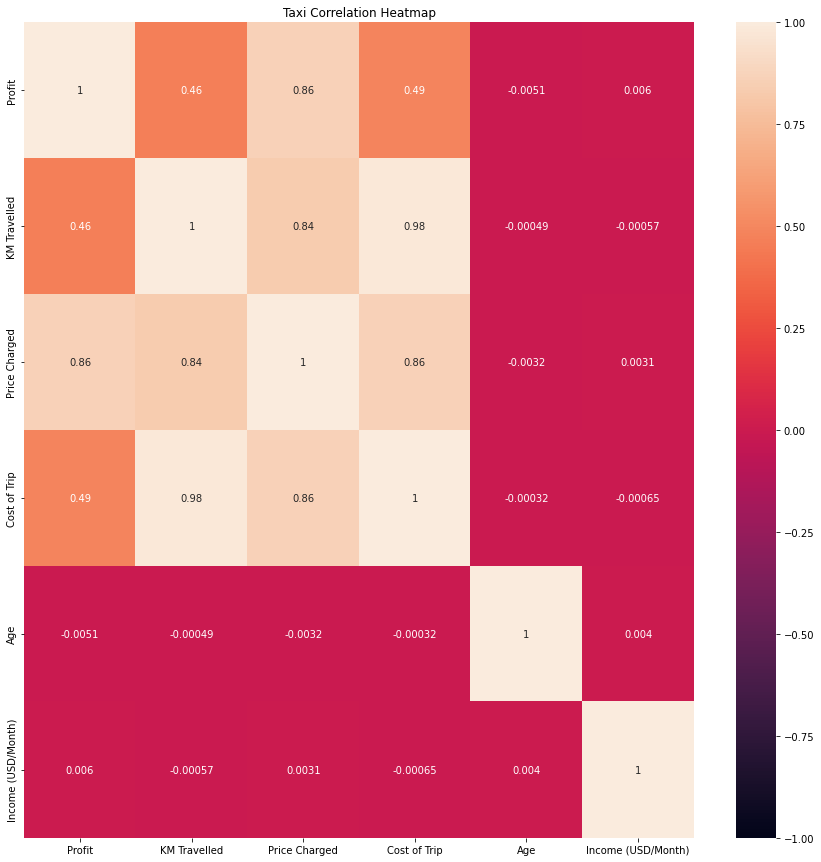

In [358]:
data_numeric=data_merged[['Profit','KM Travelled','Price Charged','Cost of Trip','Age','Income (USD/Month)']]
plt.figure(figsize=(15,15))
sns.heatmap(data_numeric.corr(),vmin=-1,vmax=1,annot=True)
plt.title("Taxi Correlation Heatmap")
plt.show()



*   Profit is highly correlated to the distance travelled (in Kilometers)
*   Distance travelled is correlated to price charged and cost of trip





**2. Value Distribution**


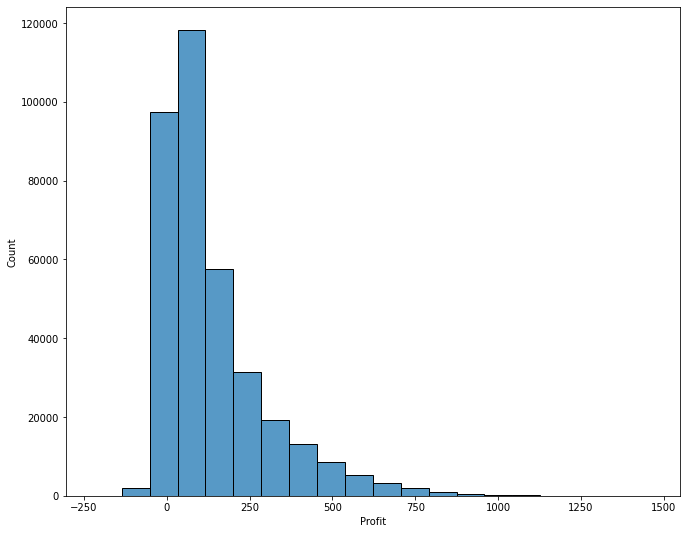

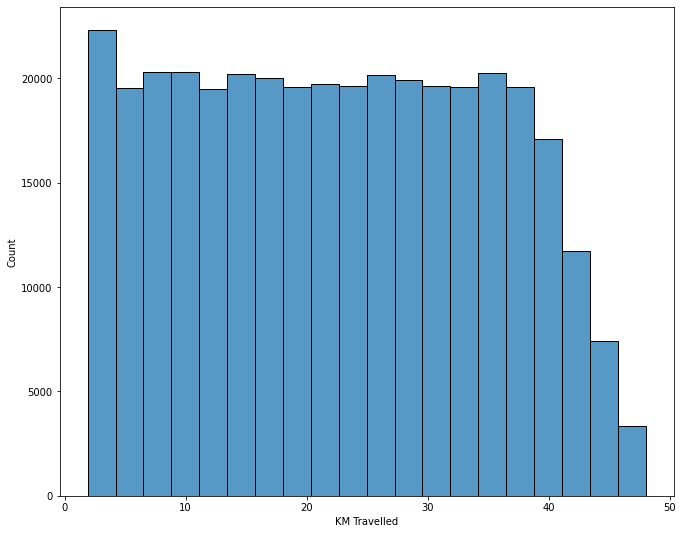

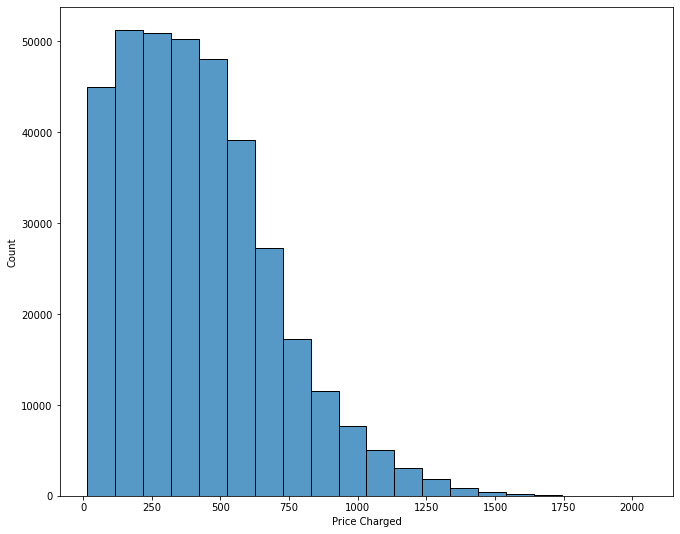

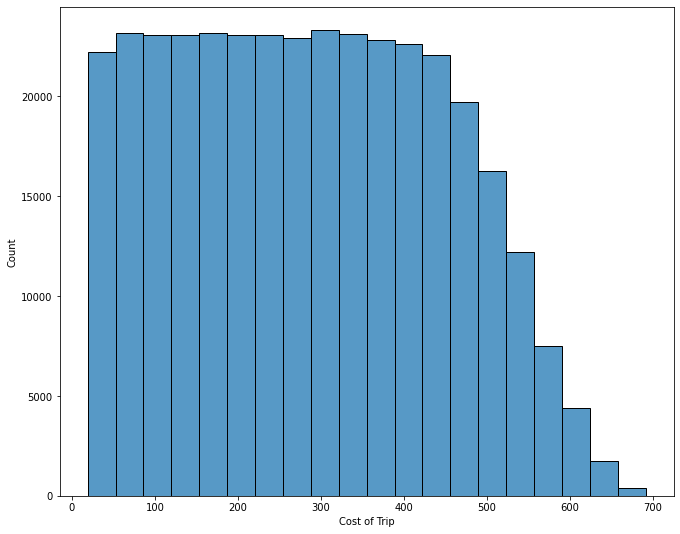

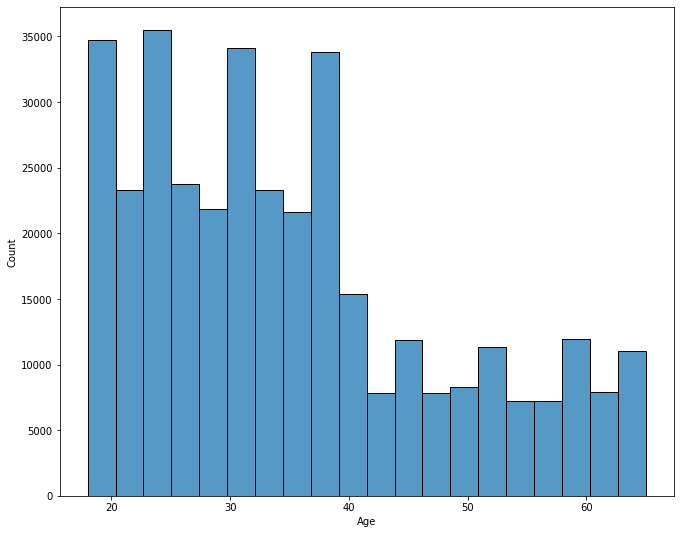

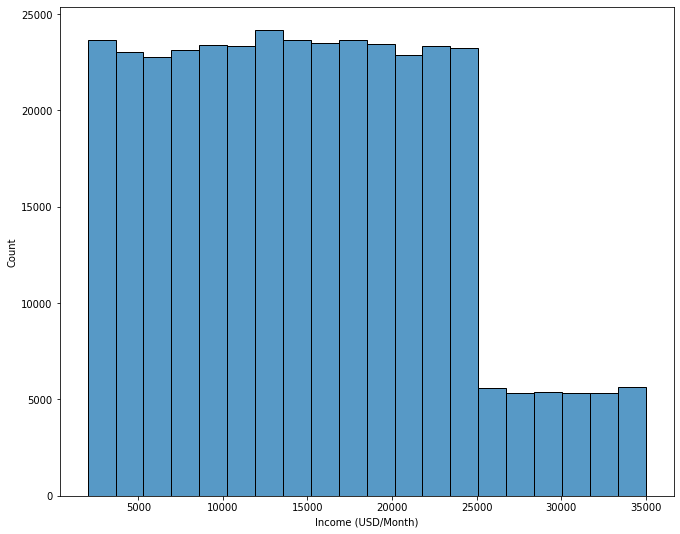

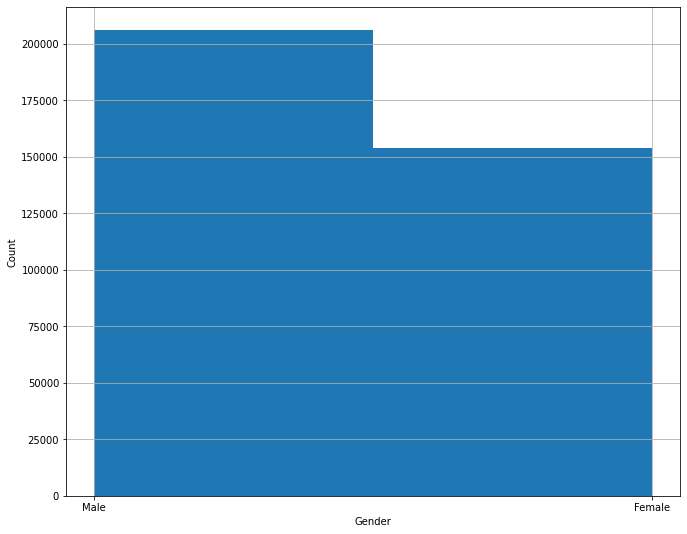

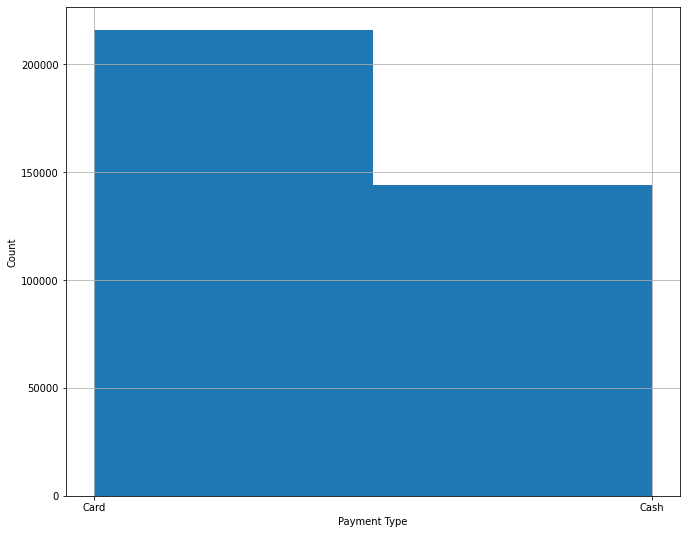

In [359]:
#See distributions of values
cols=data_numeric.columns
for i in cols:
  ax=sns.histplot(data=data_numeric[i], bins=20)
  plt.show()

data_merged['Gender'].hist(bins=2)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()
data_merged['Payment_Mode'].hist(bins=2)
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.show()

**3-(1). Comparisons: Annual profits and number of rides**

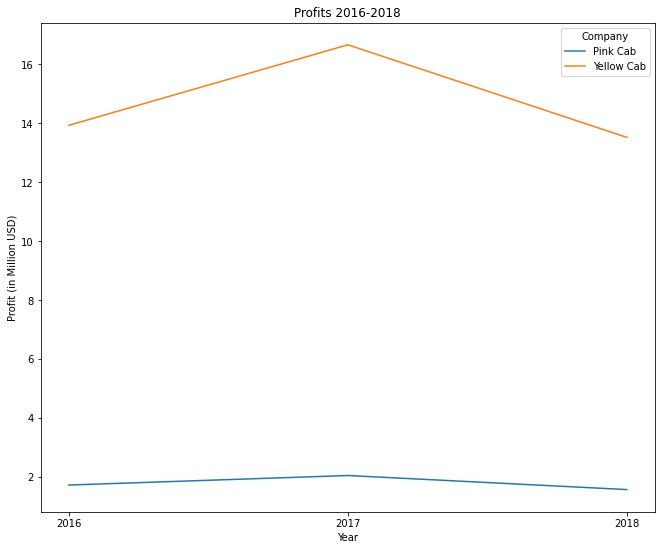

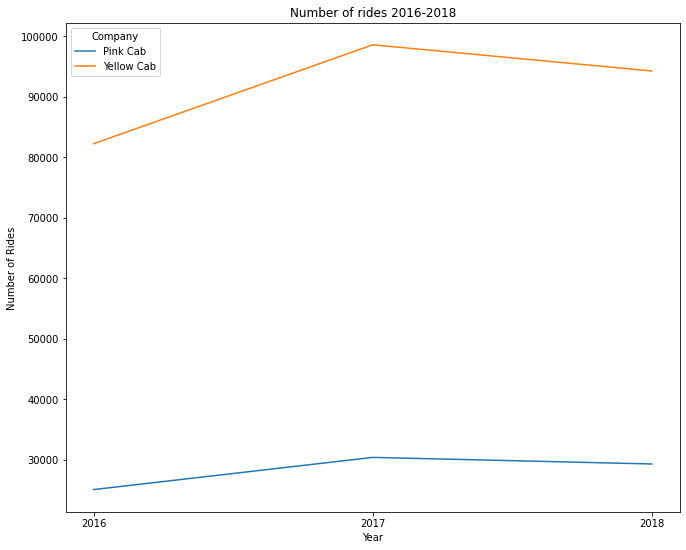

In [360]:
#Compare annual profits and number of rides between the two companies

#Annual profits 2016-2018, companywise
data_merged['Year'] = pd.DatetimeIndex(data_merged['Date']).year
profit_annual=data_merged.groupby(['Year','Company'])['Profit'].sum()
profit_annual=pd.DataFrame(profit_annual)

sns.lineplot(data=profit_annual,x='Year',y='Profit',hue='Company')
plt.title('Profits 2016-2018')
plt.xticks(np.arange(2016, 2019, 1), labels=['2016','2017','2018'])
plt.yticks(np.arange(0.2e+07,1.8e+07,0.2e+07), labels=[2,4,6,8,10,12,14,16])
plt.ylabel('Profit (in Million USD)')
plt.show()

#Annual number of rides 2016-2018, companywise
rides_annual=data_merged.groupby(['Year','Company'])['Transaction ID'].count()
rides_annual=pd.DataFrame(rides_annual)

sns.lineplot(data=rides_annual,x='Year',y='Transaction ID',hue='Company')
plt.title('Number of rides 2016-2018')
plt.xticks(np.arange(2016, 2019, 1), labels=['2016','2017','2018'])
plt.ylabel('Number of Rides')
plt.show()

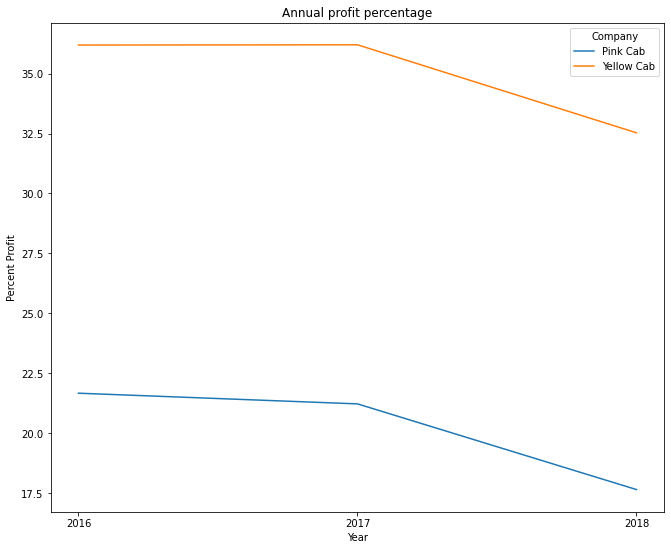

In [361]:
#Compare Annual Profit Percentage

sum_profit=data_merged.groupby(['Company','Year'])['Profit'].sum()
sum_profit=pd.DataFrame(sum_profit)
sum_revenue=data_merged.groupby(['Company','Year'])['Price Charged'].sum()
sum_revenue=pd.DataFrame(sum_revenue)
percent_profit=sum_profit.merge(sum_revenue,on=['Company','Year'])

percent_profit['Percent Profit']=percent_profit['Profit']/percent_profit['Price Charged']*100
percent_profit=percent_profit.reset_index()

sns.lineplot(data=percent_profit,x='Year',y='Percent Profit',hue='Company')
plt.title('Annual profit percentage')
plt.xticks(np.arange(2016, 2019, 1), labels=['2016','2017','2018'])
plt.show()

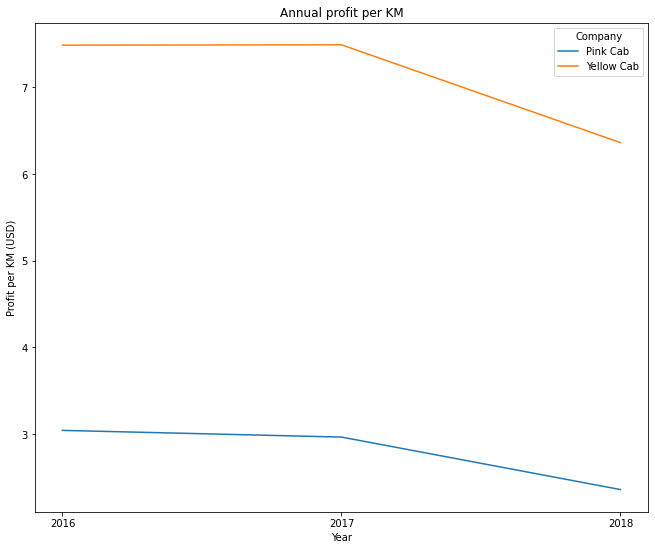

In [362]:
#Compare Profit per KM

sum_profit=data_merged.groupby(['Company','Year'])['Profit'].sum()
sum_profit=pd.DataFrame(sum_profit)
sum_KM=data_merged.groupby(['Company','Year'])['KM Travelled'].sum()
profit_per_KM=sum_profit.merge(sum_KM,on=['Company','Year'])

profit_per_KM['Profit per Kilometers']=profit_per_KM['Profit']/profit_per_KM['KM Travelled']
profit_per_KM=profit_per_KM.reset_index()

sns.lineplot(data=profit_per_KM,x='Year',y='Profit per Kilometers',hue='Company')
plt.title('Annual profit per KM')
plt.xticks(np.arange(2016, 2019, 1), labels=['2016','2017','2018'])
plt.ylabel('Profit per KM (USD)')
plt.show()

**3-(2) Comparison: Customer share in each city**

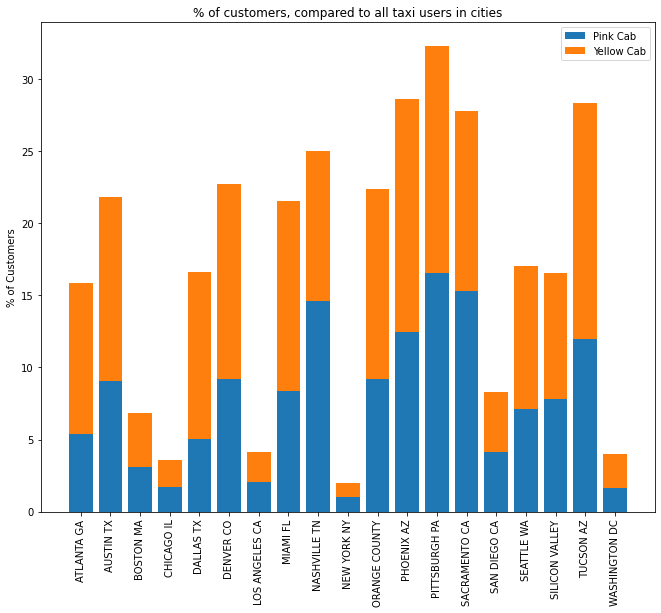

In [363]:
#Stacked Graphs-citywise customers

data_merged_pink=data_merged[data_merged['Company']=='Pink Cab']
data_merged_pink_city=data_merged_pink[['City','Customer ID']]
data_merged_pink_city=data_merged_pink_city.groupby('City')['Customer ID'].nunique()
data_merged_pink_city=pd.DataFrame(data_merged_pink_city)
data_merged_pink_city=data_merged_pink_city.reset_index()

data_merged_yellow=data_merged[data_merged['Company']=='Yellow Cab']
data_merged_yellow_city=data_merged_yellow[['City','Customer ID']]
data_merged_yellow_city=data_merged_yellow_city.groupby('City')['Customer ID'].nunique()
data_merged_yellow_city=pd.DataFrame(data_merged_yellow_city)
data_merged_yellow_city=data_merged_yellow_city.reset_index()

data_merged_compare_city=data_merged_pink_city.merge(data_merged_yellow_city,on='City',suffixes=('_pink','_yellow'))
data_merged_compare_city=data_merged_compare_city.merge(city,on='City')
data_merged_compare_city=pd.DataFrame(data_merged_compare_city)
data_merged_yellow_city=data_merged_compare_city.reset_index()

data_merged_compare_city['Pink Cab']=data_merged_compare_city['Customer ID_pink']/data_merged_compare_city['Users']*100
data_merged_compare_city['Yellow Cab']=data_merged_compare_city['Customer ID_yellow']/data_merged_compare_city['Users']*100

fig, ax=plt.subplots()
ax.bar(data_merged_compare_city['City'], data_merged_compare_city['Pink Cab'],label='Pink Cab')
ax.bar(data_merged_compare_city['City'], data_merged_compare_city['Yellow Cab'], bottom=data_merged_compare_city['Pink Cab'],label='Yellow Cab')
ax.set_title('% of customers, compared to all taxi users in cities')
ax.set_xticklabels(data_merged_compare_city['City'],rotation=90)
ax.set_ylabel("% of Customers")
ax.legend()
plt.show()

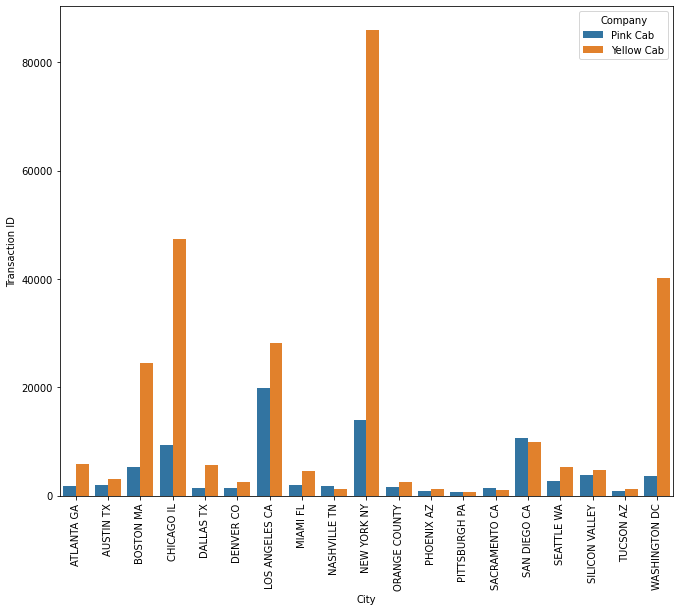

In [364]:


data_merged_by_cities_tr=data_merged[['Transaction ID','City','Profit','Company']]
data_merged_by_cities_tr=data_merged_by_cities_tr.groupby(['City','Company'])['Transaction ID'].count()
data_merged_by_cities_tr=pd.DataFrame(data_merged_by_cities_tr)
data_merged_by_cities_tr=data_merged_by_cities_tr.reset_index()
ax=sns.barplot(data=data_merged_by_cities_tr,x='City',y='Transaction ID',hue='Company')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

**4. Holidays and Mean Profit 2016-2018**

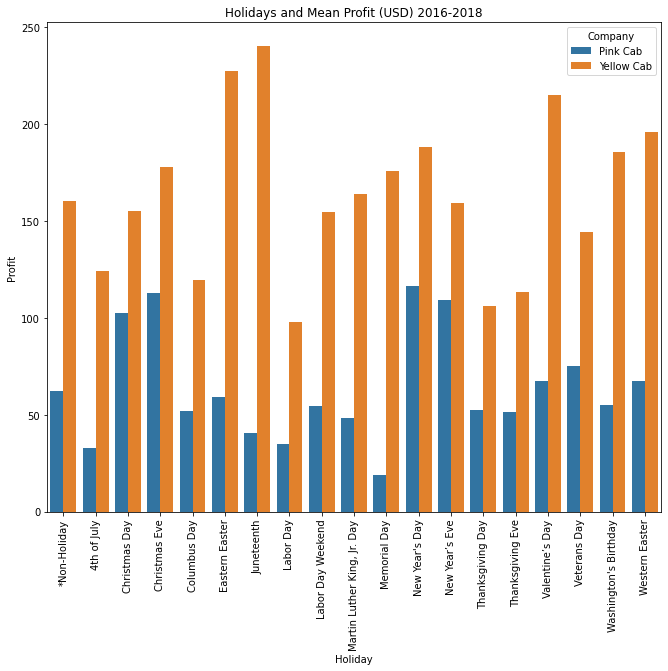

In [384]:
data_merged_by_holidays=data_merged[['Holiday','Profit','Company']]
data_merged_by_holidays=data_merged_by_holidays.groupby(['Holiday','Company'])['Profit'].mean()
data_merged_by_holidays=pd.DataFrame(data_merged_by_holidays)
data_merged_by_holidays=data_merged_by_holidays.reset_index()
ax=sns.barplot(data=data_merged_by_holidays,x='Holiday',y='Profit',hue='Company')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Holidays and Mean Profit (USD) 2016-2018')
plt.show()

# **Hypotheses**

**1. Is there a significant difference in mean of profits between two companies?**
1.   H0: Mean(Pink Cab profit) = Mean (Yellow Cab profit)
2.   HA: Mean(Pink Cab profit) != Mean (Yellow Cab profit)

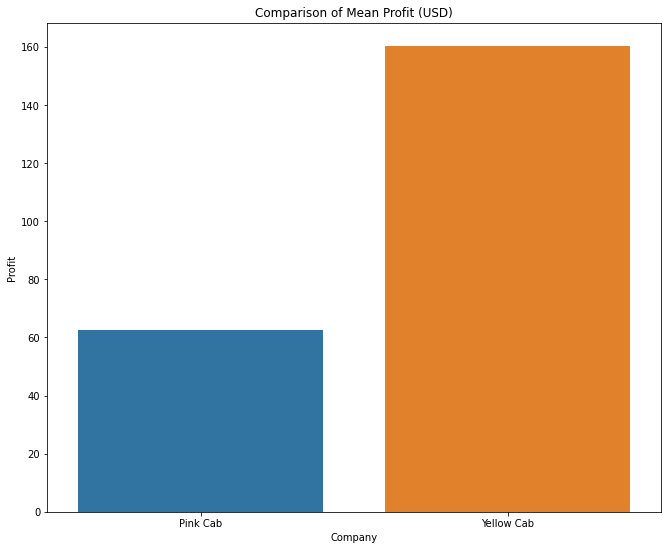

In [366]:
#Visualize the data
data_merged_mean_profit=data_merged.groupby('Company')['Profit'].mean()
data_merged_mean_profit=pd.DataFrame(data_merged_mean_profit)
data_merged_mean_profit=data_merged_mean_profit.reset_index()
sns.barplot(data=data_merged_mean_profit,x='Company',y='Profit').set(title='Comparison of Mean Profit (USD)')
plt.show()


In [367]:
pink_profit=data_merged[data_merged['Company']=='Pink Cab']['Profit']
yellow_profit=data_merged[data_merged['Company']=='Yellow Cab']['Profit']

#Test for normal distribution (Anderson-Darling Test)
result = scipy.stats.anderson(pink_profit)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

result = scipy.stats.anderson(yellow_profit)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

#Data DO NOT distribute normally: Use Mann-Whitney U test
stat, p = scipy.stats.mannwhitneyu(pink_profit, yellow_profit)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistic: 2986.464
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)
Statistic: 13476.910
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)
Statistics=7198251597.000, p=0.000
Different distribution (reject H0)


*   H0 rejected (p<0.05): There is a difference in profits between the two companies.

*   As illustrated by the graph, Yellow Cab makes more profit than Pink Cab does.



**2. Does the profit made by the two companies differ by cities?** 


1.   H0: There is no difference in profits when categorized by cities
*         HA: Profits vary over cities

2.   H0: There is no difference in profits when categorized by companies      
*   HA: Profits vary over companies






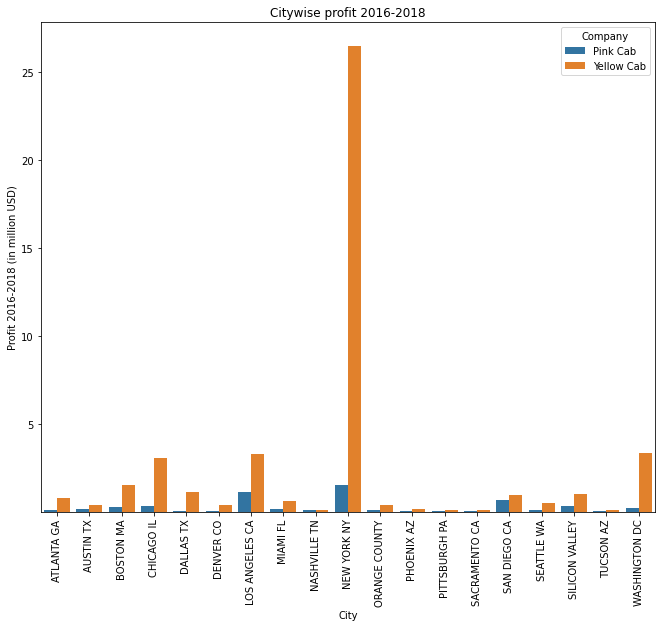

In [368]:
#Visualize the profit

data_merged_by_cities=data_merged[['Transaction ID','City','Profit','Company']]
data_merged_by_cities=data_merged_by_cities.groupby(['City','Company'])['Profit'].sum()
data_merged_by_cities=pd.DataFrame(data_merged_by_cities)
data_merged_by_cities=data_merged_by_cities.reset_index()
ax=sns.barplot(data=data_merged_by_cities,x='City',y='Profit',hue='Company')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Citywise profit 2016-2018')
plt.yticks(np.arange(0.5e+07,3.0e+07,0.5e+07), labels=[5,10,15,20,25])

plt.ylabel('Profit 2016-2018 (in million USD)')
plt.show()

In [369]:
#Run two-way ANOVA (for 2 categorical variables)

#Use boxcox method because the data is not normally distributed
data_merged_by_cities['Profit_boxcox'],fitted_lambda = scipy.stats.boxcox(data_merged_by_cities['Profit'])

#Run two-way ANOVA
model = ols('Profit_boxcox ~ C(Company)+ C(City)', data_merged_by_cities).fit()
print(f"Overall model F({model.df_model: },{model.df_resid: }) = {model.fvalue: }, p = {model.f_pvalue: }")
model.summary()

Overall model F( 19.0, 18.0) =  9.312858209174443, p =  8.10003462797131e-06


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Profit_boxcox   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     9.313
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           8.10e-06
Time:                        03:03:27   Log-Likelihood:                 37.571
No. Observations:                  38   AIC:                            -35.14
Df Residuals:                      18   BIC:                            -2.391
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     5.9926      0.095     63.149      0.000       5.793       6.192
C(Company)[T.Yellow Cab]      0.2870      0.042      6.763      0.000       0.198       0.376
C(City)[T.AUSTIN TX]         -0.0140      0.131     -0.107      0.916      -0.289       0.261
C(City)[T.BOSTON MA]          0.1616      0.131      1.235      0.233      -0.113       0.436
C(City)[T.CHICAGO IL]         0.2332      0.131      1.783      0.091      -0.042       0.508
C(City)[T.DALLAS TX]         -0.1333      0.131     -1.019      0.322      -0.408       0.141
C(City)[T.DENVER CO]         -0.1674      0.131     -1.280      0.217      -0.442       0.107
C(City)[T.LOS ANGELES CA]     0.3486      0.131      2.665      0.016       0.074       0.623
C(City)[T.MIAMI FL]           0.0369      0.131      0.282      0.781      -0.238       0.312
C(City)[T.NASHVILLE TN]      -0.2596      0.131     -1.984      0.063      -0.534       0.015
C(City)[T.NEW YORK NY]        0.4996      0.131      3.820      0.001       0.225       0.774
C(City)[T.ORANGE COUNTY]     -0.0598      0.131     -0.457      0.653      -0.335       0.215
C(City)[T.PHOENIX AZ]        -0.2652      0.131     -2.027      0.058      -0.540       0.010
C(City)[T.PITTSBURGH PA]     -0.4550      0.131     -3.478      0.003      -0.730      -0.180
C(City)[T.SACRAMENTO CA]     -0.3138      0.131     -2.399      0.028      -0.589      -0.039
C(City)[T.SAN DIEGO CA]       0.2066      0.131      1.579      0.132      -0.068       0.481
C(City)[T.SEATTLE WA]        -0.0190      0.131     -0.145      0.886      -0.294       0.256
C(City)[T.SILICON VALLEY]     0.1520      0.131      1.162      0.260      -0.123       0.427
C(City)[T.TUCSON AZ]         -0.2750      0.131     -2.102      0.050      -0.550      -0.000
C(City)[T.WASHINGTON DC]      0.1894      0.131      1.448      0.165      -0.085       0.464
==============================================================================
Omnibus:                        2.831   Durbin-Watson:                   3.146
Prob(Omnibus):                  0.243   Jarque-Bera (JB):                1.961
Skew:                           0.000   Prob(JB):                        0.375
Kurtosis:                       4.113   Cond. No.                         22.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""



*   The profit difference between Yellow Cab and Pink Cab is statistically significant (p=0.00). As visualized by the bar plot, Yellow Cab gained significantly more profit compared to Pink Cab.

*   The profit is significantly different in some cities. For example, New York City (p=0.001) has significantly higher profit.



**3. Do the companies differ in customer retention?** 



1.  H0: There is no difference in mean number of rides one customer has in each company.
*   HA: Two taxi companies differ in mean number of rides one customer has.

2. H0: The number of customers are equally distributed when categorized by number of rides.
*  HA: The number of customers in categories are different customers are categorized by number of rides.


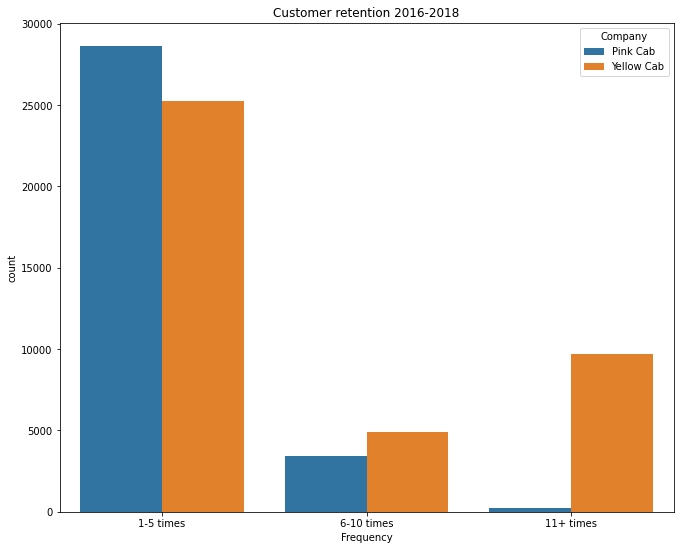

In [370]:
#Visualize the Data

data_merged_customers=data_merged[['Customer ID','Company','Transaction ID']]
data_merged_customers=data_merged_customers.groupby(['Customer ID','Company'])['Transaction ID'].count()
data_merged_customers=pd.DataFrame(data_merged_customers)
data_merged_customers['Count']=data_merged_customers['Transaction ID']
data_merged_customers=data_merged_customers.reset_index()

data_merged_customers.loc[(data_merged_customers['Count'] < 6),'Frequency'] = '1-5 times'
data_merged_customers.loc[(data_merged_customers['Count'] >= 6) & (data_merged_customers['Transaction ID'] <11),  'Frequency'] = '6-10 times'
data_merged_customers.loc[(data_merged_customers['Count'] >= 11),  'Frequency'] = '11+ times'

sns.countplot(data=data_merged_customers,x='Frequency',hue='Company',order=['1-5 times','6-10 times','11+ times'])
plt.title('Customer retention 2016-2018')
plt.show()


In [371]:
#Hypothesis testing: Two-Way ANOVA

#Use boxcox method because the data is not normally distributed
data_merged_customers['Count_boxcox'],fitted_lambda = scipy.stats.boxcox(data_merged_customers['Count'])

model = ols('Count_boxcox ~ C(Company)+ C(Frequency)', data_merged_customers).fit()
print(f"Overall model F({model.df_model: },{model.df_resid: }) = {model.fvalue: }, p = {model.f_pvalue: }")
model.summary()

Overall model F( 3.0, 72222.0) =  40415.089550317876, p =  0.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Count_boxcox   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                 4.042e+04
Date:                Mon, 13 Jun 2022   Prob (F-statistic):               0.00
Time:                        03:03:28   Log-Likelihood:                -31026.
No. Observations:               72226   AIC:                         6.206e+04
Df Residuals:                   72222   BIC:                         6.210e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.4044      0.002    190.587      0.000       0.400       0.409
C(Company)[T.Yellow Cab]       0.0104      0.003      3.514      0.000       0.005       0.016
C(Frequency)[T.11+ times]      1.2213      0.004    282.423      0.000       1.213       1.230
C(Frequency)[T.6-10 times]     0.9350      0.004    213.344      0.000       0.926       0.944
==============================================================================
Omnibus:                    20040.801   Durbin-Watson:                   1.620
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4754.203
Skew:                           0.367   Prob(JB):                         0.00
Kurtosis:                       1.980   Cond. No.                         4.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


*  There is a difference in number of customers who keep using a certain company (p=0.00). 
*  Also there are differences in number of customers among different use frequency groups
*  As seen in the chart, Yellow Cab has better customer retention compared to Pink Cab, and there are a larger number of customers who use Yellow Cab more than 10 times compared to the customers who use Pink Cab more than 10 times.



**4. Does one company have significantly more profit in certain age groups, compared to the other company?**

1.  H0: There is no difference in profits the two company makes
*   HA: There is difference in profits the two company makes

2.  H0: There is no significant difference among age groups in terms of contribution to making profits
*   HA: There is no significant difference among age groups in terms of contribution to making profits



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


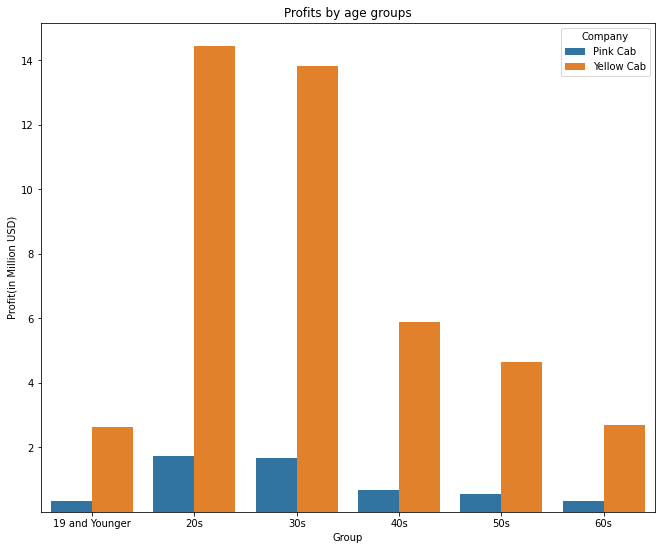

In [372]:
#Visualize the data
data_merged_by_ages=data_merged[['Age','Profit','Company']]
pd.DataFrame(data_merged_by_ages)
data_merged_by_ages.loc[(data_merged_by_ages.Age < 20),'Group'] = '19 and Younger'
data_merged_by_ages.loc[(data_merged_by_ages.Age >= 20) & (data_merged_by_ages.Age < 30),  'Group'] = '20s'
data_merged_by_ages.loc[(data_merged_by_ages.Age >= 30) & (data_merged_by_ages.Age < 40),  'Group'] = '30s'
data_merged_by_ages.loc[(data_merged_by_ages.Age >= 40) & (data_merged_by_ages.Age < 50),  'Group'] = '40s'
data_merged_by_ages.loc[(data_merged_by_ages.Age >= 50) & (data_merged_by_ages.Age < 60),  'Group'] = '50s'
data_merged_by_ages.loc[(data_merged_by_ages.Age >= 60) & (data_merged_by_ages.Age < 70),  'Group'] = '60s'
data_merged_by_ages.loc[(data_merged_by_ages.Age >= 70),'Group'] = '70 and Older'

data_merged_by_ages_profit=data_merged_by_ages.groupby(['Group','Company'])['Profit'].sum()
data_merged_by_ages_profit=data_merged_by_ages_profit.reset_index()

sns.barplot(data=data_merged_by_ages_profit,x='Group',y='Profit',hue='Company')
plt.yticks(np.arange(0.2e+07,1.6e+07,0.2e+07), labels=[2,4,6,8,10,12,14])
plt.title('Profits by age groups')
plt.ylabel('Profit(in Million USD)')
plt.show()

In [373]:
#Use boxcox method because the data is not normally distributed
data_merged_by_ages_profit['Profit_boxcox'],fitted_lambda = scipy.stats.boxcox(data_merged_by_ages_profit['Profit'])

#Run two-way ANOVA
model = ols('Profit_boxcox ~ C(Company)+ C(Group)', data_merged_by_ages_profit).fit()
print(f"Overall model F({model.df_model: },{model.df_resid: }) = {model.fvalue: }, p = {model.f_pvalue: }")
model.summary()

Overall model F( 6.0, 5.0) =  2899.223142221008, p =  1.101800623523508e-08


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Profit_boxcox   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2899.
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           1.10e-08
Time:                        03:03:28   Log-Likelihood:                 35.210
No. Observations:                  12   AIC:                            -56.42
Df Residuals:                       5   BIC:                            -53.03
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   10.3256      0.015    678.260      0.000      10.286      10.365
C(Company)[T.Yellow Cab]     1.2779      0.012    111.043      0.000       1.248       1.307
C(Group)[T.20s]              1.0017      0.020     50.254      0.000       0.950       1.053
C(Group)[T.30s]              0.9741      0.020     48.871      0.000       0.923       1.025
C(Group)[T.40s]              0.4483      0.020     22.489      0.000       0.397       0.499
C(Group)[T.50s]              0.3193      0.020     16.019      0.000       0.268       0.371
C(Group)[T.60s]             -0.0058      0.020     -0.289      0.784      -0.057       0.045
==============================================================================
Omnibus:                        3.898   Durbin-Watson:                   3.238
Prob(Omnibus):                  0.142   Jarque-Bera (JB):                1.154
Skew:                          -0.000   Prob(JB):                        0.561
Kurtosis:                       1.480   Cond. No.                         7.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*   The profit is significantly higher in Yellow Cab (p=0.000), as illustrated in Hypothesis 3 and the chart above.
*   Contributions to profit also varies over age groups.
*   As the bar chart illustrates, Yellow Cab makes higher profit in all age groups.



**5. Does a certain company is preferred in customers who travel certain distances?**



1.  H0: There is no difference in profits the two company makes
*   HA: There is difference in profits the two company makes

2.   H0: There is no significant difference among age groups in terms of contribution to making profits
*   HA: There is no significant difference among age groups in terms of contribution to making profits

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


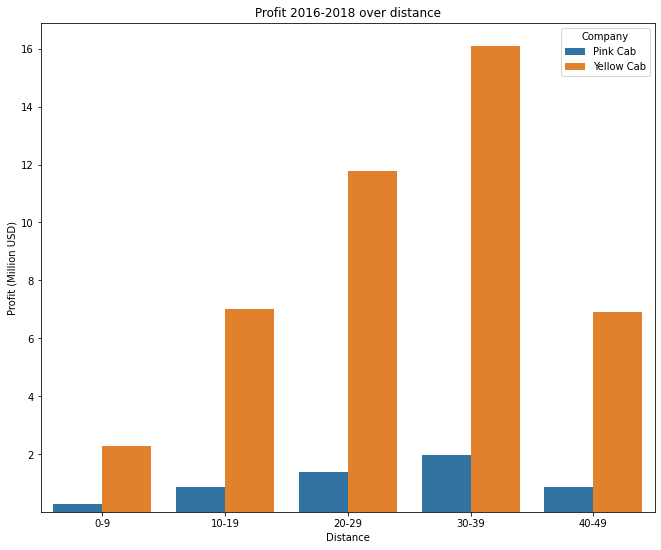

In [374]:
#Compare Profit over distances
data_merged_by_distance=data_merged[['Transaction ID','KM Travelled','Profit','Company']]
pd.DataFrame(data_merged_by_distance)
data_merged_by_distance.loc[(data_merged_by_distance['KM Travelled']< 10),'Distance'] = '0-9'
data_merged_by_distance.loc[(data_merged_by_distance['KM Travelled'] >= 10) & (data_merged_by_distance['KM Travelled'] < 20),  'Distance'] = '10-19'
data_merged_by_distance.loc[(data_merged_by_distance['KM Travelled'] >= 20) & (data_merged_by_distance['KM Travelled'] <30),  'Distance'] = '20-29'
data_merged_by_distance.loc[(data_merged_by_distance['KM Travelled'] >= 30) & (data_merged_by_distance['KM Travelled'] <40),  'Distance'] = '30-39'
data_merged_by_distance.loc[(data_merged_by_distance['KM Travelled'] >= 40) & (data_merged_by_distance['KM Travelled'] < 50),  'Distance'] = '40-49'
data_merged_by_distance.loc[(data_merged_by_distance['KM Travelled'] >= 50), 'Distance'] = '50 and longer'

data_merged_by_distance_profit=data_merged_by_distance.groupby(['Distance','Company'])['Profit'].sum()
data_merged_by_distance_profit=data_merged_by_distance_profit.reset_index()

sns.barplot(data=data_merged_by_distance_profit,x='Distance',y='Profit',hue='Company')
plt.yticks(np.arange(0.2e+07,1.8e+07,0.2e+07), labels=[2,4,6,8,10,12,14,16])
plt.title('Profit 2016-2018 over distance')
plt.ylabel('Profit (Million USD)')
plt.show()

In [375]:
#Use boxcox method because the data is not normally distributed
data_merged_by_distance_profit['Profit_boxcox'],fitted_lambda = scipy.stats.boxcox(data_merged_by_distance_profit['Profit'])

#Run two-way ANOVA
model = ols('Profit_boxcox ~ C(Company)+ C(Distance)', data_merged_by_distance_profit).fit()
print(f"Overall model F({model.df_model: },{model.df_resid: }) = {model.fvalue: }, p = {model.f_pvalue: }")
model.summary()

Overall model F( 5.0, 4.0) =  1079.6622597217897, p =  2.3967194017593166e-06


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Profit_boxcox   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1080.
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           2.40e-06
Time:                        03:03:29   Log-Likelihood:                 12.957
No. Observations:                  10   AIC:                            -13.91
Df Residuals:                       4   BIC:                            -12.10
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   16.7689      0.081    206.736      0.000      16.544      16.994
C(Company)[T.Yellow Cab]     4.1346      0.066     62.430      0.000       3.951       4.319
C(Distance)[T.10-19]         2.1252      0.105     20.295      0.000       1.834       2.416
C(Distance)[T.20-29]         3.1296      0.105     29.886      0.000       2.839       3.420
C(Distance)[T.30-39]         3.7865      0.105     36.160      0.000       3.496       4.077
C(Distance)[T.40-49]         2.1175      0.105     20.222      0.000       1.827       2.408
==============================================================================
Omnibus:                        0.404   Durbin-Watson:                   2.845
Prob(Omnibus):                  0.817   Jarque-Bera (JB):                0.462
Skew:                           0.000   Prob(JB):                        0.794
Kurtosis:                       1.947   Cond. No.                         6.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""



*   There are significant differences among profits made within different travel distance ranges
*   There is a significant difference between profits made by two companies
*   Yellow Cab makes significantly higher profits than Pink Cab in terms of different distance ranges, including distances over 40KM (where the profit noticeably decreases in both companies)

**6. Does customers in certain income groups contribute more to a certain company?**

1.  H0: There is no difference in profits the two company makes
*   HA: There is difference in profits the two company makes
2.  H0: There is no significant difference among age groups in terms of contribution to making profits
*   HA: There is no significant difference among age groups in terms of contribution to making profits





/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


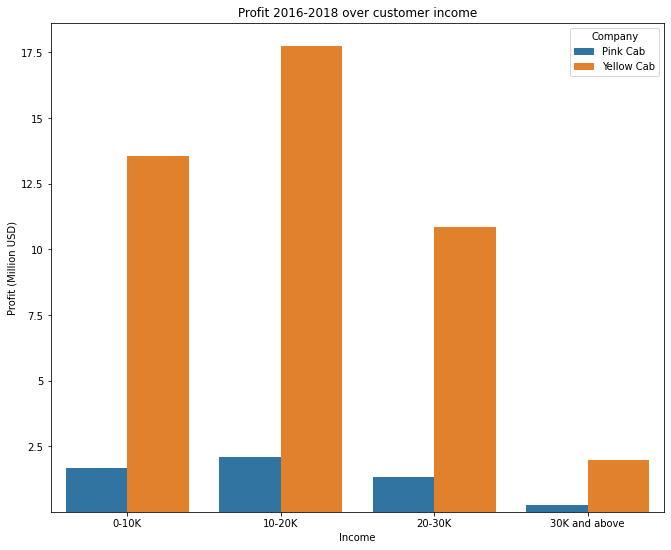

In [376]:
# Visualize the data
data_merged_by_income=data_merged[['Transaction ID', 'Income (USD/Month)', 'Company', 'Profit']]
pd.DataFrame(data_merged_by_income)
data_merged_by_income.loc[(data_merged_by_income['Income (USD/Month)']< 10000),'Income'] = '0-10K'
data_merged_by_income.loc[(data_merged_by_income['Income (USD/Month)'] >= 10000) & (data_merged_by_income['Income (USD/Month)'] < 20000),  'Income'] = '10-20K'
data_merged_by_income.loc[(data_merged_by_income['Income (USD/Month)'] >= 20000) & (data_merged_by_income['Income (USD/Month)'] <30000),  'Income'] = '20-30K'
data_merged_by_income.loc[(data_merged_by_income['Income (USD/Month)'] >= 30000),  'Income'] = '30K and above'


data_merged_by_income_profit=data_merged_by_income.groupby(['Income','Company'])['Profit'].sum()
data_merged_by_income_profit=data_merged_by_income_profit.reset_index()

sns.barplot(data=data_merged_by_income_profit,x='Income',y='Profit',hue='Company')
plt.yticks(np.arange(0.25e+07, 2e+07,0.25e+07), labels=[2.5,5,7.5,10,12.5,15,17.5])
plt.title('Profit 2016-2018 over customer income')
plt.ylabel('Profit (Million USD)')
plt.show()

In [377]:
#Use boxcox method because the data is not normally distributed
data_merged_by_income_profit['Profit_boxcox'],fitted_lambda = scipy.stats.boxcox(data_merged_by_income_profit['Profit'])

#Run two-way ANOVA
model = ols('Profit_boxcox ~ C(Company)+ C(Income)', data_merged_by_income_profit).fit()
print(f"Overall model F({model.df_model: },{model.df_resid: }) = {model.fvalue: }, p = {model.f_pvalue: }")
model.summary()

Overall model F( 4.0, 3.0) =  170.16586113379623, p =  0.0007247920178274514


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Profit_boxcox   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     170.2
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           0.000725
Time:                        03:03:29   Log-Likelihood:                -3.1615
No. Observations:                   8   AIC:                             16.32
Df Residuals:                       3   BIC:                             16.72
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     30.3074      0.464     65.348      0.000      28.831      31.783
C(Company)[T.Yellow Cab]       8.5432      0.415     20.595      0.000       7.223       9.863
C(Income)[T.10-20K]            1.0712      0.587      1.826      0.165      -0.796       2.938
C(Income)[T.20-30K]           -0.9631      0.587     -1.642      0.199      -2.830       0.904
C(Income)[T.30K and above]    -7.4534      0.587    -12.705      0.001      -9.320      -5.586
==============================================================================
Omnibus:                        0.006   Durbin-Watson:                   2.696
Prob(Omnibus):                  0.997   Jarque-Bera (JB):                0.228
Skew:                          -0.000   Prob(JB):                        0.892
Kurtosis:                       2.174   Cond. No.                         5.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""



*   Two companies have significantly different level of profits
*   Contribution to profit significantly drop in customers whose monthly income is over 30,000 dollars, however Yellow Cab makes higher profit compared to Pink Cab

**7. Are holidays related to changes in mean profits of two companies?**

1.   H0: There is no difference in mean profits the two company makes
*   HA: There is difference in mean profits the two company makes
2.   H0: There is no significant difference in mean profits between holidays and non-holidays
*   HA: There is significant difference in mean profits between holidays and non-holidays




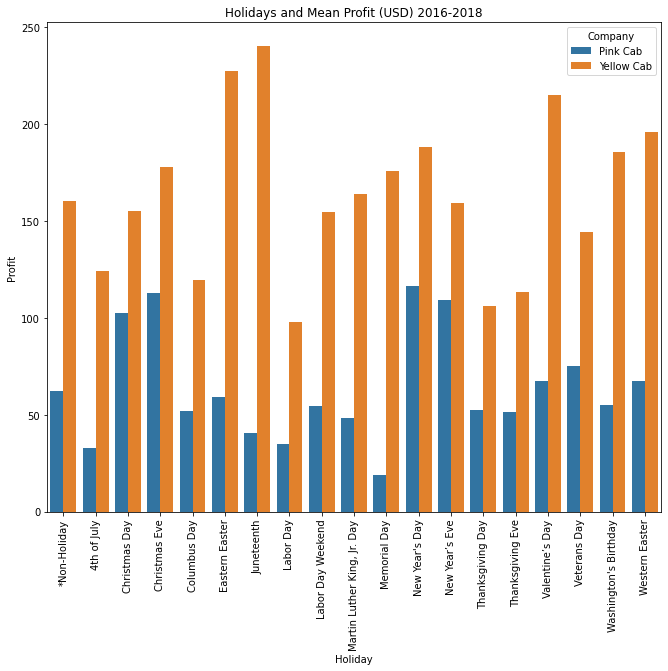

In [383]:
#Visualization
ax=sns.barplot(data=data_merged_by_holidays,x='Holiday',y='Profit',hue='Company')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Holidays and Mean Profit (USD) 2016-2018')
plt.show()

In [389]:
#Use boxcox method because the data is not normally distributed

data_merged_by_holidays['Profit_boxcox'],fitted_lambda = scipy.stats.boxcox(data_merged_by_holidays['Profit'])

#Run two-way ANOVA
model = ols('Profit_boxcox ~ C(Company)+ C(Holiday)', data_merged_by_holidays).fit()
print(f"Overall model F({model.df_model: },{model.df_resid: }) = {model.fvalue: }, p = {model.f_pvalue: }")
model.summary()

Overall model F( 19.0, 18.0) =  6.830172673316254, p =  7.65537097403169e-05


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Profit_boxcox   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     6.830
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           7.66e-05
Time:                        04:18:11   Log-Likelihood:                -71.301
No. Observations:                  38   AIC:                             182.6
Df Residuals:                      18   BIC:                             215.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 11.7232      1.665      7.039      0.000       8.224      15.222
Company[T.Yellow Cab]                      7.5292      0.745     10.109      0.000       5.964       9.094
Holiday[T.4th of July]                    -2.8835      2.296     -1.256      0.225      -7.706       1.939
Holiday[T.Christmas Day]                   1.6040      2.296      0.699      0.494      -3.219       6.427
Holiday[T.Christmas Eve]                   2.6475      2.296      1.153      0.264      -2.175       7.470
Holiday[T.Columbus Day]                   -1.8428      2.296     -0.803      0.433      -6.666       2.980
Holiday[T.Eastern Easter]                  1.6427      2.296      0.716      0.483      -3.180       6.466
Holiday[T.Juneteenth]                      0.9253      2.296      0.403      0.692      -3.898       5.748
Holiday[T.Labor Day]                      -3.6766      2.296     -1.602      0.127      -8.499       1.146
Holiday[T.Labor Day Weekend]              -0.5674      2.296     -0.247      0.808      -5.390       4.256
Holiday[T.Martin Luther King, Jr. Day]    -0.6346      2.296     -0.276      0.785      -5.458       4.188
Holiday[T.Memorial Day]                   -2.4308      2.296     -1.059      0.304      -7.254       2.392
Holiday[T.New Year's Day]                  3.0598      2.296      1.333      0.199      -1.763       7.883
Holiday[T.New Year’s Eve]                  1.9857      2.296      0.865      0.398      -2.837       6.809
Holiday[T.Thanksgiving Day]               -2.2977      2.296     -1.001      0.330      -7.121       2.525
Holiday[T.Thanksgiving Eve]               -2.0698      2.296     -0.902      0.379      -6.893       2.753
Holiday[T.Valentine’s Day]                 1.7601      2.296      0.767      0.453      -3.063       6.583
Holiday[T.Veterans Day]                    0.1403      2.296      0.061      0.952      -4.683       4.963
Holiday[T.Washington's Birthday]           0.3624      2.296      0.158      0.876      -4.461       5.185
Holiday[T.Western Easter]                  1.2682      2.296      0.552      0.587      -3.555       6.091
==============================================================================
Omnibus:                        0.254   Durbin-Watson:                   3.171
Prob(Omnibus):                  0.881   Jarque-Bera (JB):                0.448
Skew:                          -0.000   Prob(JB):                        0.799
Kurtosis:                       2.468   Cond. No.                         22.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*   Two companies have significantly different level of profits
*   We cannot say there is a significant difference in mean profit between holidays and non-holidays

# **Seasonality of Profits 2016-2018**

**1. Check for seasonality using decomposition**

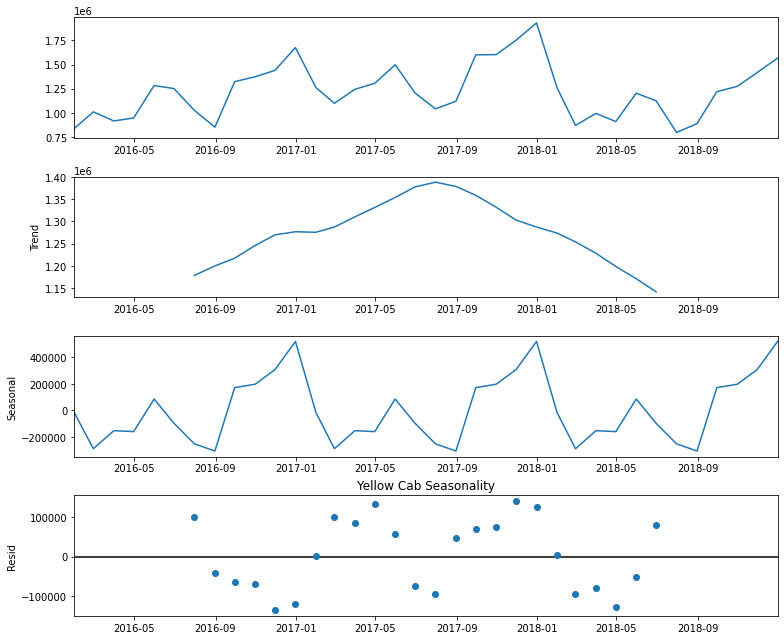

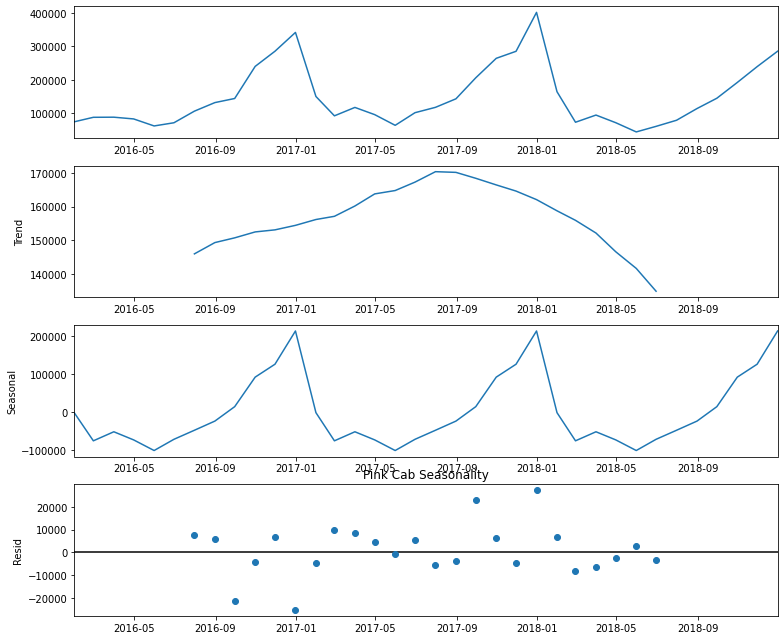

In [378]:
#Check for seasonality (decompose)
y = data_merged.groupby(['Date','Company'])['Profit'].sum()
y = pd.DataFrame(y)
y = y.reset_index()

y_pink=y[y['Company']=='Pink Cab']
y_pink=y_pink.drop('Company',axis=1)
y_pink=y_pink.reset_index(drop=True)
y_pink_ssn=y_pink.set_index('Date')
y_pink_ssn=y_pink_ssn.resample('M').sum()

y_yellow=y[y['Company']=='Yellow Cab']
y_yellow=y_yellow.drop('Company',axis=1)
y_yellow=y_yellow.reset_index(drop=True)
y_yellow_ssn=y_yellow.set_index('Date')
y_yellow_ssn=y_yellow_ssn.resample('M').sum()

from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

decomposition_yellow = sm.tsa.seasonal_decompose(y_yellow_ssn, model='additive')
decomposition_pink = sm.tsa.seasonal_decompose(y_pink_ssn, model='additive')
decomposition_yellow.plot()
plt.title('Yellow Cab Seasonality')
plt.show()

decomposition_pink.plot()
plt.title('Pink Cab Seasonality')
plt.show()




*  As described in the decomposition charts, both Pink Cab and Yellow Cab's profits display seasonality.



**2. Illustration of profits in detail: Monthly, weekly, and daily**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

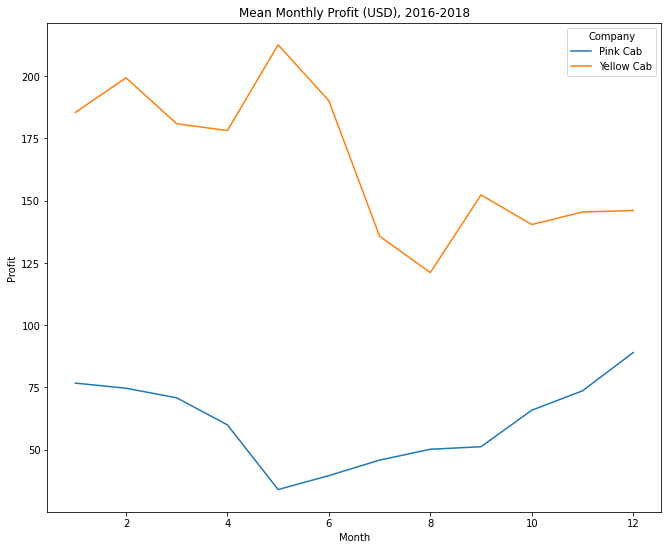

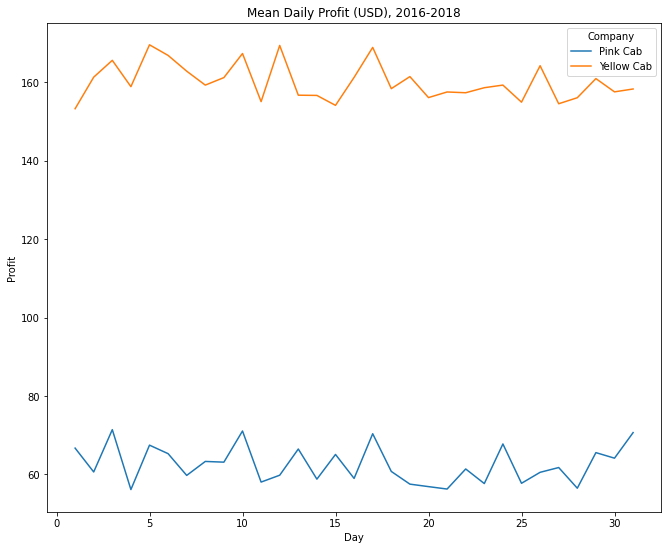

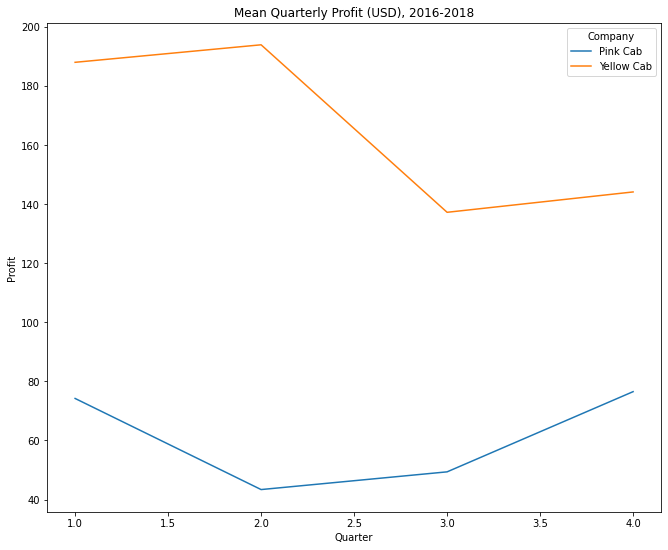

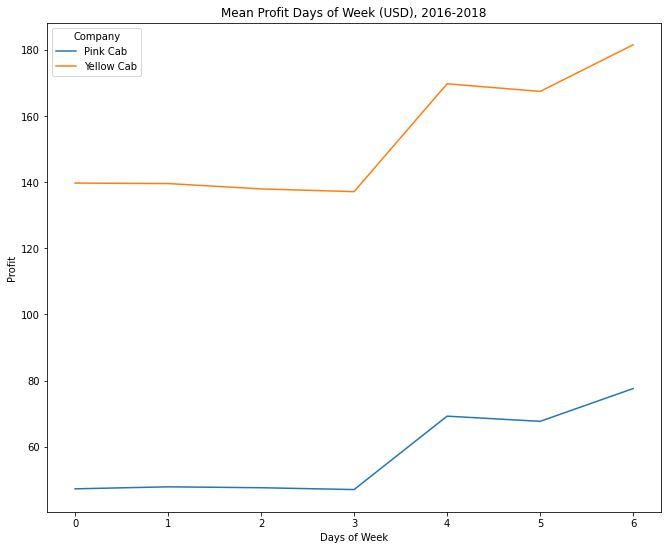

In [379]:
#Check for Seasonality: month, date & quarter

data_merged_seasonality=data_merged[['Transaction ID','Date','Company','KM Travelled','Profit']]
data_merged_seasonality['Year'] = pd.DatetimeIndex(data_merged['Date']).year
data_merged_seasonality['Month'] = pd.DatetimeIndex(data_merged['Date']).month
data_merged_seasonality['Day'] = pd.DatetimeIndex(data_merged['Date']).day
data_merged_seasonality['Quarter'] = pd.DatetimeIndex(data_merged['Date']).quarter
data_merged_seasonality['Days of Week'] = pd.DatetimeIndex(data_merged['Date']).weekday

# MONTH
data_merged_seasonality_monthly_profit=data_merged_seasonality.groupby(['Company','Month']).mean('Profit')
pd.DataFrame(data_merged_seasonality_monthly_profit)
data_merged_seasonality_monthly_profit=data_merged_seasonality_monthly_profit.reset_index()

sns.lineplot(data=data_merged_seasonality_monthly_profit,x='Month',y='Profit',hue='Company')
plt.title('Mean Monthly Profit (USD), 2016-2018')
plt.show()

#DATES
data_merged_seasonality_daily_profit=data_merged_seasonality.groupby(['Company','Day']).mean('Profit')
pd.DataFrame(data_merged_seasonality_daily_profit)
data_merged_seasonality_daily_profit=data_merged_seasonality_daily_profit.reset_index()

sns.lineplot(data=data_merged_seasonality_daily_profit,x='Day',y='Profit',hue='Company')
plt.title('Mean Daily Profit (USD), 2016-2018')
plt.show()

#QUARTER
data_merged_seasonality_quarterly_profit=data_merged_seasonality.groupby(['Company','Quarter']).mean('Profit')
pd.DataFrame(data_merged_seasonality_quarterly_profit)
data_merged_seasonality_quarterly_profit=data_merged_seasonality_quarterly_profit.reset_index()

sns.lineplot(data=data_merged_seasonality_quarterly_profit,x='Quarter',y='Profit',hue='Company')
plt.title('Mean Quarterly Profit (USD), 2016-2018')
plt.show()

#DAYS OF WEEK
data_merged_seasonality_dow_profit=data_merged_seasonality.groupby(['Company','Days of Week']).mean('Profit')
pd.DataFrame(data_merged_seasonality_dow_profit)
data_merged_seasonality_dow_profit=data_merged_seasonality_dow_profit.reset_index()

sns.lineplot(data=data_merged_seasonality_dow_profit,x='Days of Week',y='Profit',hue='Company')
plt.title('Mean Profit Days of Week (USD), 2016-2018')
plt.show()



*   Both Yellow and Pink Cab Company shows similar seasonalities in profits
*   Profits of both companies are highest in the last quarter of the year.
*   Profits of both companies are highest on the third day of each month and the pattern repeats every 7 days. Profits are higher in the beginning of the month and gradually decrease towards the end of the month.
*   Profits are lower in the beginning of the week, start increasing on Wednesdays and peak over the weekend.





# **Conclusions**

*   Both Pink Cab and Yellow Cab display seasonality in sales and profit.
*   Both Pink Cab and Yellow Cab experienced decline in profit in year 2018.
*   Overall, Yellow Cab has higher profit and number of customers than Pink Cab.
*   Yellow Cab also has better reach in smaller markets, such as groups of long-distance travellers, loyal customers, and higher-income customers.
*   Based on above findings, investment to Yellow Cab is recommended.